# 函数解析  
### numpy.random.randn 生成符合标准正太分布的矩阵
numpy.random.randn(d0, d1, … ,dn)，括号中为生成矩阵的维度，均值为0，方差为1，记为`N(0, 1)`，下面在 cell 部分验证此函数是否按照标准正太分布生成数据

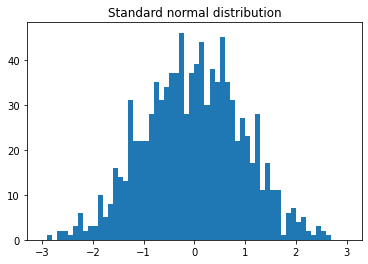

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v1 as tf

tf.disable_eager_execution()


x_1 = np.random.randn(1000)
x_value = []
y_value = []
step = 0.1
neg_boundary = -3
pos_boundary = 3
for i in range(int((pos_boundary - neg_boundary) /step)):
    y =((neg_boundary + i * step < x_1) & (x_1 < neg_boundary + (i + 1) * step)).sum()
    x_value.append(round((neg_boundary + i * step + step / 2), 3))
    y_value.append(y)

plt.bar(x_value, y_value, width=0.1)
plt.title('Standard normal distribution')
plt.show()

## python字符 * 和 ** 的拆包（打散）功能
### * 与 ** 能够进行拆包与打散功能
下面列举了 Tuple List String Dict

In [2]:
# Tuple break up
print('*******Tuple break up*******')
Tuple = (1, 2, 3, 4)
print('Tuple:', Tuple)
print('Tuple break up:', *Tuple)
print('*******List break up*******')

# List break up
List = ['a', 'b', 'c']
print('List:', List)
print('List break up:', *List)

# String break up
print('*******String break up*******')
String = 'hello'
print('String:', String)
print('String break up', *String)

# Dictionary break u
print('*******Dictionary break up*******')
def func_dic(name, age):
    print(name, age)

Dict = {'name':'Qhao', 'age':20}

# Only the value is broken up, and this sentence
# is equivalent to func_dic(name='Qhao', age=20)
func_dic(**Dict)

func_dic(name='Qhao', age=20)

try:
    print(**Dict)  # 报错
except TypeError:
    print('\'name\' is an invalid keyword argument for this function')


*******Tuple break up*******
Tuple: (1, 2, 3, 4)
Tuple break up: 1 2 3 4
*******List break up*******
List: ['a', 'b', 'c']
List break up: a b c
*******String break up*******
String: hello
String break up h e l l o
*******Dictionary break up*******
Qhao 20
Qhao 20
'name' is an invalid keyword argument for this function


## zip 函数  
zip 函数可以理解其为一个月老，专门为两组数据进行配对

In [3]:
x_group = [1, 2, 3, 4, 5]
y_group = ['a', 'b', 'c', 'd', 'e']
x_love_y = zip(x_group, y_group)
for x_single_dog, y_single_cat in x_love_y:
    print('They are a pair now:', x_single_dog, y_single_cat)

They are a pair now: 1 a
They are a pair now: 2 b
They are a pair now: 3 c
They are a pair now: 4 d
They are a pair now: 5 e


# 正式开始

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sys


# Set a random seed
np.random.seed(5)

In [5]:
x_data = np.linspace(-1, 1, 100)

# numpy.random.randn() Standard normal distribution data
y_data = 2 * x_data + 1.0 + np.random.randn(*x_data.shape) * 0.4

### 绘图可视化

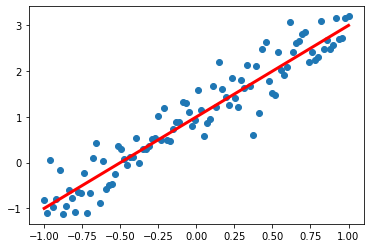

In [6]:
plt.scatter(x_data, y_data)
plt.plot(x_data, 2 * x_data + 1.0, color='red', linewidth=3)
plt.show()

### 定义占位符

In [7]:
x = tf.placeholder('float', name='x')
y = tf.placeholder('float', name='y')

### 模型构建

In [8]:
def model(x, w, b):
    return tf.multiply(x, w) + b

### 创建变量
Tensorflow变量声明函数 tf.Variable  
tf.Variable 作用是保存和更新参数  
变量初始值可以是随机数、常数、或者通过其他变量初始值计算而来  

In [9]:
w = tf.Variable(0.0, name='w0')
b = tf.Variable(0.0, name='b0')

pred = model(x, w, b)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### 训练模型  
设置参数

In [10]:
epochs = 20
learning_rate = 0.01

loss_function = tf.reduce_mean(tf.square(y - pred))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

In [11]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

step = 0
display_step = 10
loss_list = []
for epoch in range(epochs):
    for xs, ys in zip(x_data, y_data):
        _, loss = sess.run([optimizer, loss_function], feed_dict={x:xs, y:ys})
        loss_list.append(loss)
        step += 1
        if step % display_step == 0:
            print('Epoch:%3d/%d' % (epoch + 1, epochs), 'Step:{:4}'.format(step), ' loss:%f' % loss)

w_value = sess.run(w)
b_value = sess.run(b)
print('w:', w_value)
print('b:', b_value)

Epoch:  0/20 Step:  10  loss:0.326533
Epoch:  0/20 Step:  20  loss:0.083921
Epoch:  0/20 Step:  30  loss:0.106941
Epoch:  0/20 Step:  40  loss:1.567816
Epoch:  0/20 Step:  50  loss:0.629396
Epoch:  0/20 Step:  60  loss:1.122309
Epoch:  0/20 Step:  70  loss:2.202857
Epoch:  0/20 Step:  80  loss:1.303079
Epoch:  0/20 Step:  90  loss:0.781420
Epoch:  0/20 Step: 100  loss:1.611664
Epoch:  1/20 Step: 110  loss:1.301215
Epoch:  1/20 Step: 120  loss:0.074411
Epoch:  1/20 Step: 130  loss:0.071832
Epoch:  1/20 Step: 140  loss:0.365316
Epoch:  1/20 Step: 150  loss:0.007724
Epoch:  1/20 Step: 160  loss:0.093617
Epoch:  1/20 Step: 170  loss:0.500769
Epoch:  1/20 Step: 180  loss:0.144085
Epoch:  1/20 Step: 190  loss:0.032798
Epoch:  1/20 Step: 200  loss:0.444599
Epoch:  2/20 Step: 210  loss:0.596913
Epoch:  2/20 Step: 220  loss:0.008338
Epoch:  2/20 Step: 230  loss:0.045711
Epoch:  2/20 Step: 240  loss:0.315487
Epoch:  2/20 Step: 250  loss:0.001139
Epoch:  2/20 Step: 260  loss:0.014411
Epoch:  2/20

### 可视化  
比较训练出来的模型与实际模型

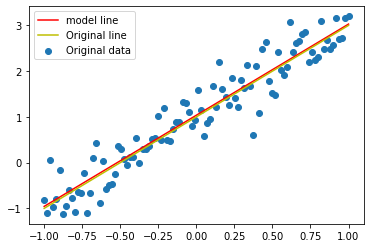

In [12]:
plt.scatter(x_data, y_data, label='Original data')
plt.plot(x_data, x_data * w_value + b_value, label='model line', color='r')
plt.plot(x_data, x_data * 2.0 + 1.0, label='Original line', color='y')
plt.legend(loc='best')

plt.show()

可视化查看 loss 值

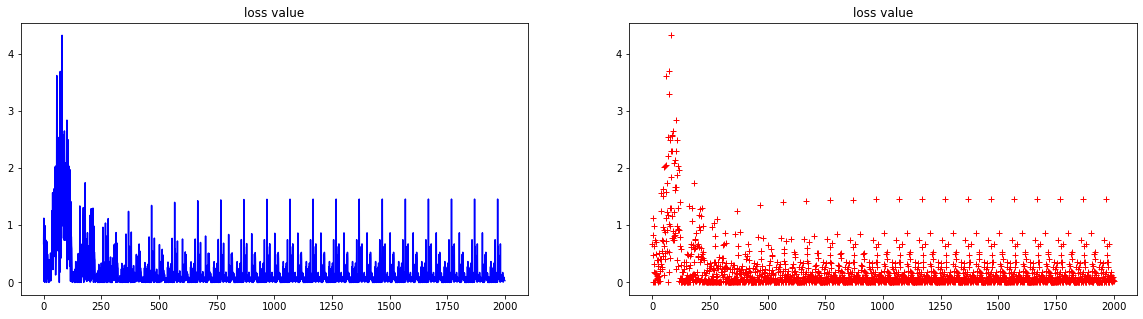

In [13]:
fig = plt.gcf()
fig.set_size_inches(20, 5)
ax_1 = plt.subplot(1, 2, 1)
ax_1.plot(loss_list, 'b')
title = 'loss value'
ax_1.set_title(title)
ax_2 = plt.subplot(1, 2, 2)
ax_2.plot(loss_list, 'r+')
ax_2.set_title(title)
plt.show()

### 利用模型预测
1.直接利用前向传播定义的 pred

In [14]:
x_test = 5.20

predict = sess.run(pred, feed_dict={x:x_test})
print('Predict Value:%f' % predict)

target = 2.0 * x_test + 1.0
print('Target Value:%f' % target)

Predict Value:11.398005
Target Value:11.400000


2.利用计算模式

In [15]:
x_test = 5.20

predict = sess.run(w) * x_test + sess.run(b)
print('Predict Value:%f' % predict)

target = 2.0 * x_test + 1.0
print('Target Value:%f' % target)

sess.close()

Predict Value:11.398005
Target Value:11.400000
